# 1. Univariate Visualizations

In [1]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data loading
df = pd.read_csv("titanic.csv")

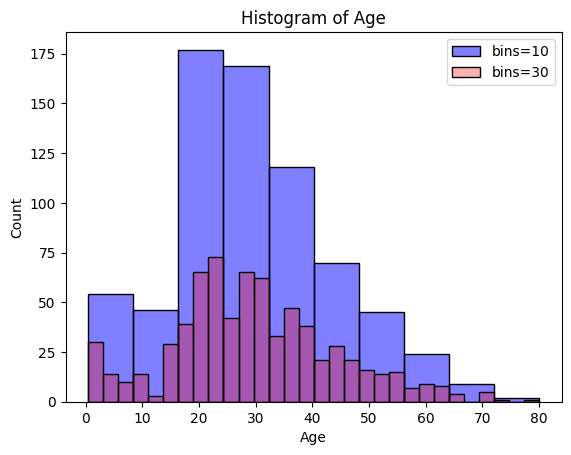

In [3]:
# 1) Histogram (Age)
# Create a histogram of Age (e.g., using sns.histplot).
# Try at least two different bin sizes (e.g., 10 and 30).

# write your code
sns.histplot(data=df, x='Age', bins=10, color="blue", alpha=0.5, label="bins=10")
sns.histplot(data=df, x='Age', bins=30, color="red", alpha=0.3, label="bins=30")
plt.legend()
plt.title("Histogram of Age")
plt.show()

Q. Compare how the shape changes and which bin size you prefer and why.  
A. 위 그림이 보여주고 있는 것은 탑승자의 나이 분포이다. 나이 범위를 간격을 촘촘하게 할수록 보다 정확한 분포가 보이게 된다. bins는 histogram을 나누는 총 개수로 bins가 클수록 간격이 더 촘촘하게 나누어진다. 더 선호하는 bins는 30인데, 나이는 가능한 값이 그렇게 많지 않기 때문에 분포가 촘촘한 것이 더 많은 정보를 제공하기 때문이다.

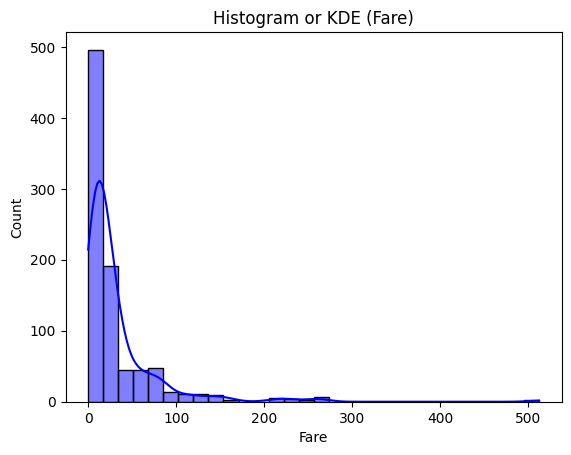

In [4]:
# 2) Histogram or KDE (Fare)
# Plot the distribution of Fare with a histogram, optionally with KDE.

# write your code
sns.histplot(data=df, x='Fare', kde=True, bins=30, color="blue")
plt.title("Histogram or KDE (Fare)")
plt.show()

Q. Comment on skewness and outliers; suggest a possible transformation (e.g., log).  
A. 데이터 분포를 보니 500에 근접하는 극단적인 값들이 존재한다. 이 경우에는 bins를 많이 쪼개어도 왼쪽에 값들이 치우치기 때문에, 실제 분포가 잘 보이지 않는다. 이러한 극단값을 다루는 한가지 방법은 log transform을 이용해 큰 값의 scale을 줄이는 것이다. np.log1p를 이용하면 이러한 작업이 가능하다.

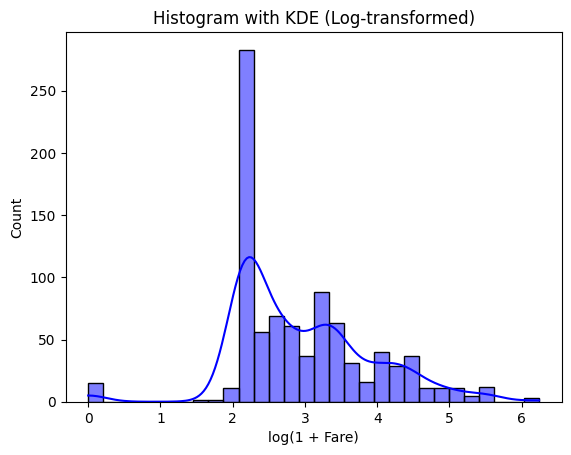

In [5]:
# Comment on skewness and outliers; suggest a possible transformation (e.g., log).

# write your code
df['Fare_log'] = np.log1p(df['Fare'])
sns.histplot(data=df['Fare_log'], kde=True, bins=30, color="blue")
plt.title("Histogram with KDE (Log-transformed)")
plt.xlabel("log(1 + Fare)")
plt.show()

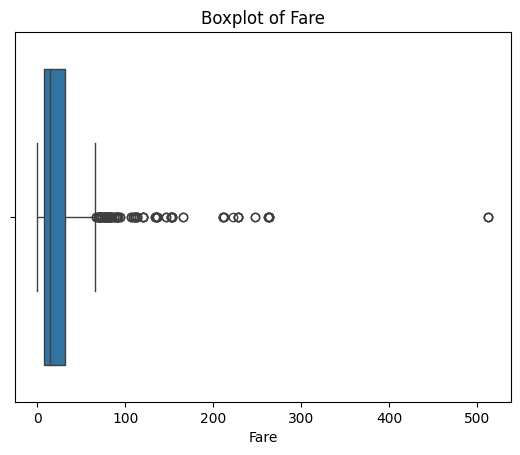

In [6]:
# 3) Boxplot (Fare)
# Produce a boxplot of Fare.

# write your code
sns.boxplot(data=df, x='Fare')
plt.title("Boxplot of Fare")
plt.show()

Explanation: 데이터 분포를 보니 500에 해당하는 극단값이 나머지 값들을 가림을 알 수 있다. IQR을 이용해 Q3에서 IQR*3 이상 떨어진 극단값들을 전부 제거하여 문제를 해결할 수 있다. 아래는 이러한 극단값을 찾는 코드이다.

In [7]:
# Identify approximate median and presence of extreme outliers.

# write your code
fare_median = df['Fare'].median()
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
extreme_thres = Q3 + 3 * IQR
extreme_outliers = df[df['Fare'] > extreme_thres]

print("Approximate Median Fare:", fare_median)
print("Extreme outlier threshold:", extreme_thres)
print("Number of extreme outliers:", len(extreme_outliers))

Approximate Median Fare: 14.4542
Extreme outlier threshold: 100.2688
Number of extreme outliers: 53


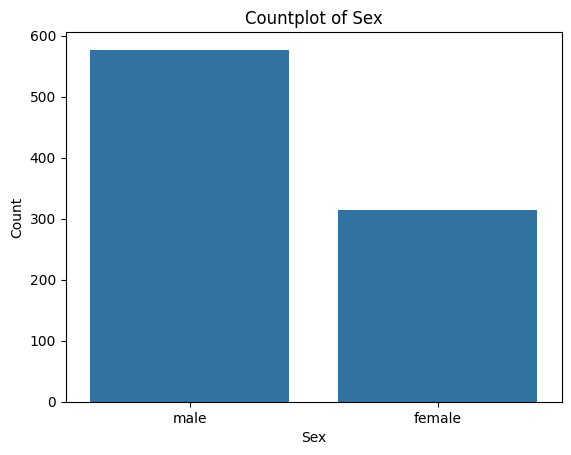

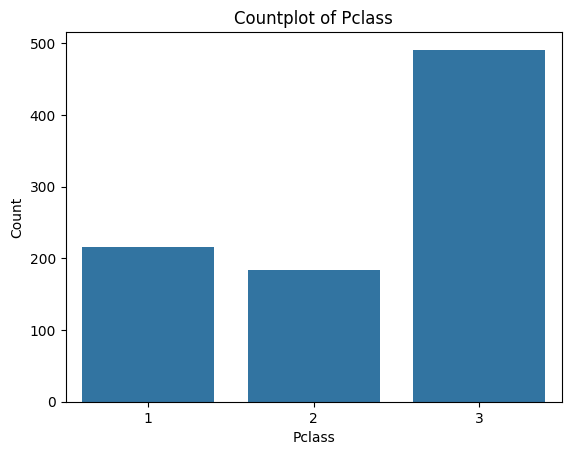

In [8]:
# 4) Countplot (Sex, Pclass)
# Create countplots for Sex and Pclass.

# write your code
# sex
sns.countplot(data=df, x='Sex')
plt.title("Countplot of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# pclass
sns.countplot(data=df, x='Pclass')
plt.title("Countplot of Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

Q. Discuss class imbalance and how it might affect survival analysis.  
A. 3등석에 탑승한 사람들이 1,2등석에 탑승한 사람들에 비해 많음을 확인해볼 수 있다. 이 비율을 고려하지 않으면, 생존자 수가 인원이 비례하여 주어졌을 때, 3등석 사람들이 더 많이 생존하였다고 오판할 수 있다.

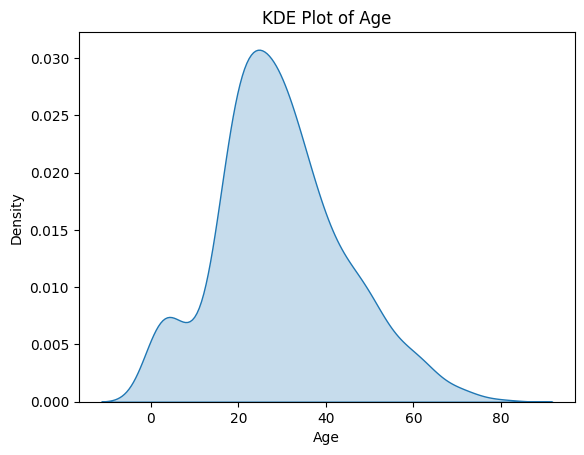

In [9]:
# 5) KDE Plot (Age)
# Plot a KDE of Age.

# write your code
sns.kdeplot(data=df['Age'], fill=True)
plt.title("KDE Plot of Age")
plt.xlabel("Age")
plt.show()

Q. Compare it to the histogram from 1): what does KDE reveal that the histogram does not?  
A. KDE는 연속적인 분포(pdf)를 그린다. 반면, histogram은 이산적인 분포(pmf)이다. KDE는 데이터의 분포 형태를 매끄럽게 보여주기에 실제 데이터의 밀도 패턴을 더 정확하게 파악할 수 있게 도와준다.

Q. Summary Paragraph. Write a short paragraph (5–7 sentences) summarizing what you learned about the marginal distributions of Age, Fare, Sex, and Pclass. Explicitly state which variable(s) you expect to be most predictive of survival and why.  
A. Univariate 시각화를 통해 Age는 20~30대가 많고 매우 어린 연령과 고령층은 적은, 오른쪽으로 치우친 분포를 보인다는 것을 알 수 있었다. Fare는 대부분의 승객이 낮은 요금을 지불하고 일부만 매우 높은 요금을 지불한, 강하게 오른쪽으로 치우친 분포를 가진다. Sex는 남성이 여성보다 뚜렷하게 많은 불균형한 분포를 보인다. Pclass 또한 3등석 승객이 가장 많고 1,2등석은 상대적으로 적어 불균형하다. 이러한 분포를 기반으로 할 때, 생존 여부를 가장 잘 예측할 수 있는 변수는 Pclass라고 예상된다. 이는 객실 등급에 따라 구명정 위치나, 데크 접근성이 달라지기 때문이다. Fare는 Pclass와 연관되어 추가적인 예측력을 가질 수 있으며, 여성과 아이들을 우선적으로 대피하게 하였을 가능성이 높으므로 Age와 Sex도 예측에 일부 기여할 수 있을 것이라 생각된다.

# 2. Bivariate Visualizations

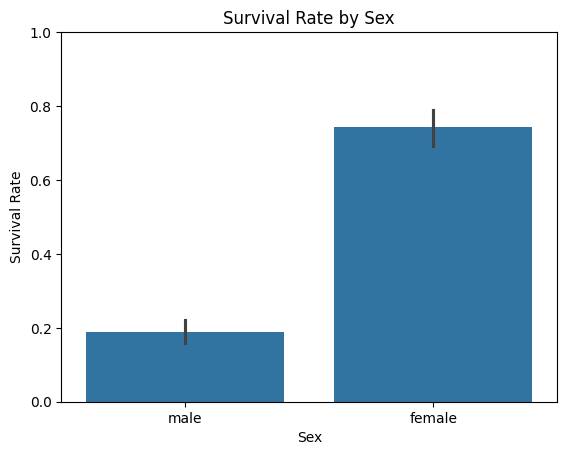

In [10]:
# 1) Barplot: Survival Rate by Sex
# Plot survival rate by Sex using a barplot (sns.barplot).

# write your code
sns.barplot(data=df, x='Sex', y='Survived', estimator='mean')
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

Q. Quantify the difference in survival rate between males and females
(approximate percentages).  
A. 남성은 대략적으로 20%가 살아남았지만, 여성은 80%가 살아남았다. 비율적으로 여성이 남성에 비해 4배 더 생존률이 높다.

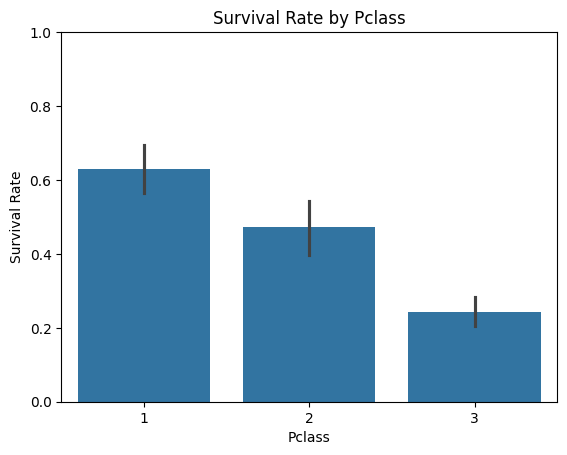

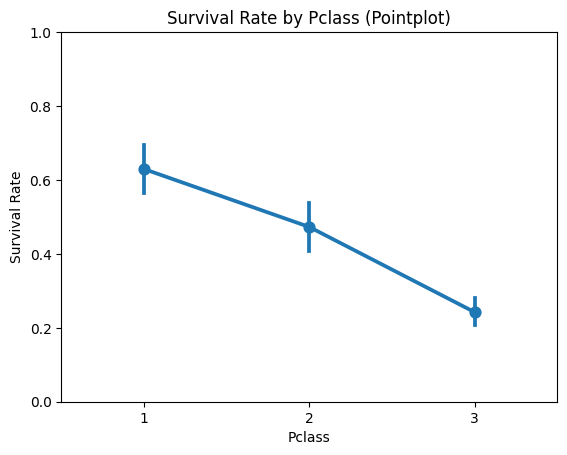

In [11]:
# 2) Barplot or Pointplot: Survival Rate by Pclass
# Plot survival rate vs. Pclass (sns.pointplot or sns.barplot).

# write your code
sns.barplot(data=df, x='Pclass', y='Survived', estimator='mean')
plt.title("Survival Rate by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

sns.pointplot(data=df, x='Pclass', y='Survived', estimator='mean')
plt.title("Survival Rate by Pclass (Pointplot)")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

Q. Comment on how survival probability changes with passenger class.  
A. 3번째 클래스의 인원이 가장 많았음에도 불구하고 가장 생존률이 낮았다. 생존률은 클래스가 올라갈수록 커지는데, 사고 현장에서 1등석에 탑승한 사람들이 더 대피하기 유리했음을 유추해볼 수 있다.

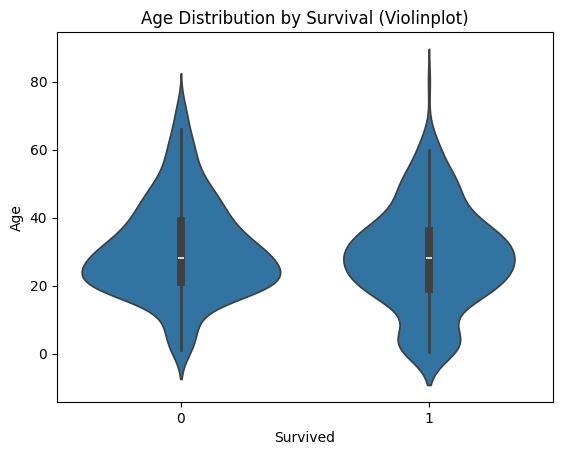

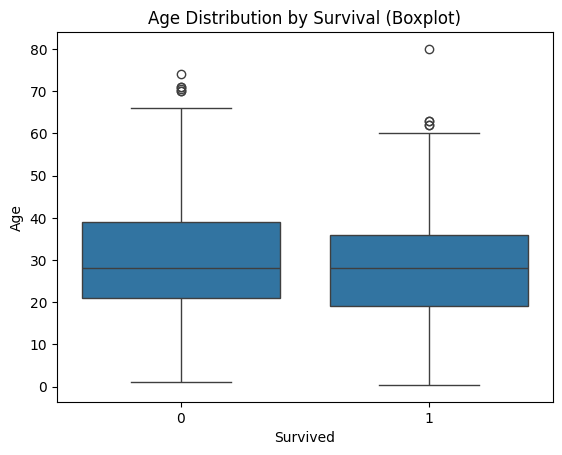

In [12]:
# 3) Violinplot or Boxplot: Age by Survival
# Plot Age (y-axis) versus Survived (x-axis) using a violinplot or boxplot.

# write your code
sns.violinplot(data=df, x='Survived', y='Age')
plt.title("Age Distribution by Survival (Violinplot)")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

sns.boxplot(data=df, x='Survived', y='Age')
plt.title("Age Distribution by Survival (Boxplot)")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

Q. Discuss differences in the distributions of age for survivors vs. non-survivors (e.g., medians, spread, presence of children).  
A. 생존자 평균 연령이 사망자 평균 연령에 비해 낮은 것을 확인해볼 수 있다. 바이올린 분포에서 보면 이는 더 명확해진다. 아이들을 위주로 구조활동이 이루어졌음을 유추해볼 수 있다.

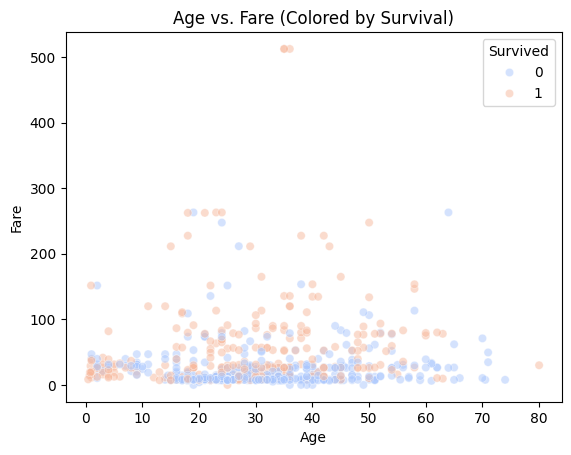

In [13]:
# 4) Scatterplot: Age vs. Fare (colored by Survived)
# Create a scatterplot of Age vs. Fare, with color (hue) indicating Survived.
# Optionally, adjust point transparency (alpha) for dense regions.
# Identify any visible cluster(s) associated with higher survival rates.

# write your code
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.5, palette='coolwarm')

plt.title("Age vs. Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()

Q. Identify any visible cluster(s) associated with higher survival rates.  
A. scatterplot을 보면 Fare가 80~150 정도로 높은 구간에서 생존자 점들이 집중되며, Age < 10인 어린 승객 사이에서도 생존자 점이 상대적으로 많이 관찰되는 것을 확인해볼 수 있다. 이는 1등석 승객들의 구명정 접근성이 좋았으며, 여성과 아이를 우선적으로 구조한다는 원칙이 적용된 것으로 봉보인다.

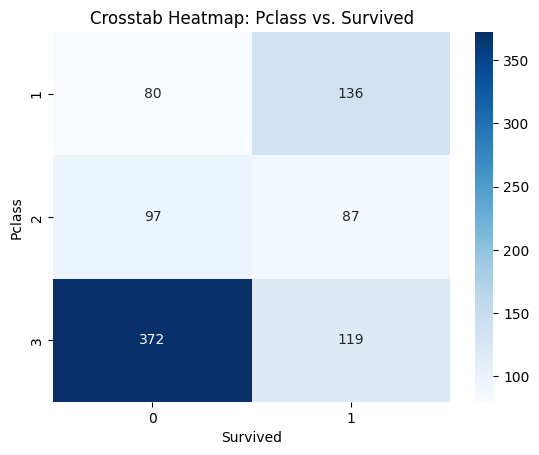

In [14]:
# 5) Crosstab and Heatmap: Pclass vs. Survived
# Create a crosstab of Pclass and Survived.
# Visualize it with a heatmap.

# write your code
ct = pd.crosstab(df['Pclass'], df['Survived'])
sns.heatmap(ct, annot=True, cmap="Blues", fmt="d")
plt.title("Crosstab Heatmap: Pclass vs. Survived")
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.show()

Q. Interpret which combinations of class and survival are most/least frequent.  
A. `3등석 & 생존 못함`이 가장 많다. 이는 3등석 승객이 가장 많음과 동시에 생존률이 매우 낮았기 때문이다. 반면, `1등석 & 생존 못함`이 가장 적다. 1등석 승객은 원래 인원수도 적은데다가 생존률도 매우 높아서 비생존자 수가 거의 없기 때문으로 생각된다.

Q. Short Reflection. Write 3–5 bullet points summarizing the strongest bivariate relationships with survival (e.g., Sex, Pclass, Fare, Age).  
A. 전반적으로 Sex > Pclass > Fare > Age 순으로 생존과의 관련성이 강하게 나타남.  
- Sex: 생존 여부와 가장 강한 관계. 여성은 남성보다 훨씬 높은 생존률을 나타남.
- Pclass: 약간 강한 관련성. 1등석 승객의 생존률이 가장 높고 3등석 승객의 생존률이 가장 낮음.
- Fare: 생존률과 양의 상관. 높은 요금을 지불한 승객(대체로 상위 클래스랑도 연관이 있음)은 생존 가능성이 높음.
- Age: 상대적으로 약한 관계. 어린 승객이 성인보다 생존률이 약간 더 높은 경향이 보임.

# 3. Multivariate Visualizations

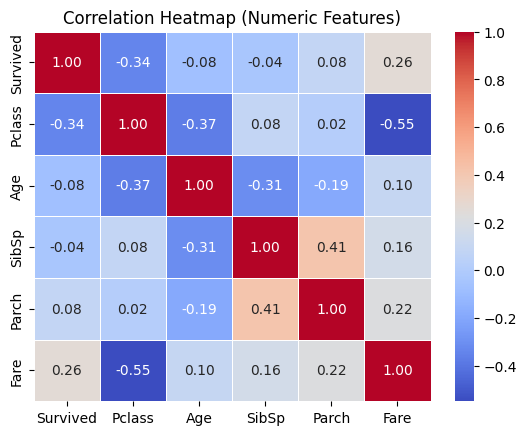

In [15]:
# 1) Correlation Heatmap
# Compute a correlation matrix for numeric features (e.g., Survived, Pclass, Age, SibSp, Parch, Fare).
# Plot it using a heatmap with annotations.

# write your code
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [16]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr()

surv_corr = corr['Survived'].drop('Survived')
sorted_corr = surv_corr.sort_values(ascending=False)

top_positive = sorted_corr.head(3)
top_negative = sorted_corr.tail(3)

print("Top Positive Correlations with Survived:")
print(top_positive)

print("Top Negative Correlations with Survived:")
print(top_negative)

Top Positive Correlations with Survived:
Fare_log    0.329862
Fare        0.257307
Parch       0.081629
Name: Survived, dtype: float64
Top Negative Correlations with Survived:
SibSp    -0.035322
Age      -0.077221
Pclass   -0.338481
Name: Survived, dtype: float64


Q. Identify the top two positive and top two negative correlations involving Survived.  
A.
- top 2 pos: fare, parch
- top 2 neg: pclass, age

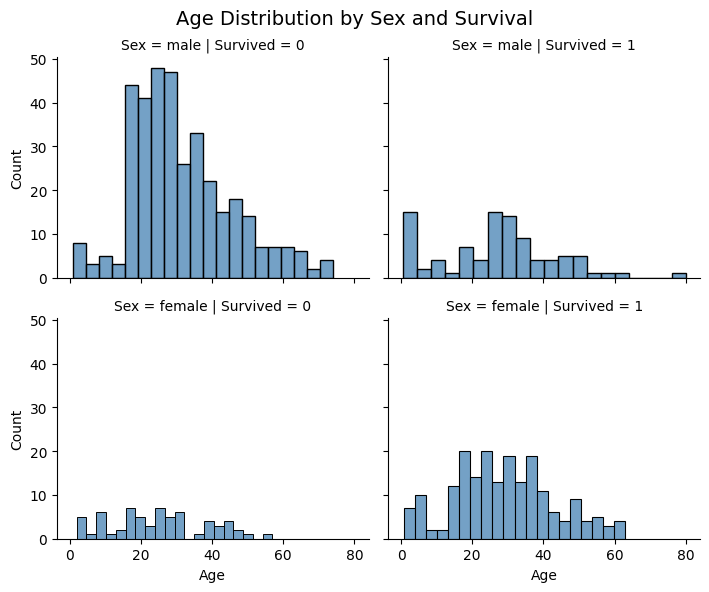

In [17]:
# 2) FacetGrid: Age by Sex and Survival
# Use a facet grid (e.g., sns.FacetGrid) to plot Age histograms conditioned on Sex (rows) and Survived (columns).

# write your code
g = sns.FacetGrid(df, row="Sex", col="Survived", height=3, aspect=1.2)
g.map(sns.histplot, "Age", bins=20, color="steelblue", kde=False)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Age Distribution by Sex and Survival", fontsize=14)
plt.show()

Q. Describe how the Age distribution differs across the four panels (male/female vs. survived/died).  
A.
- male/died: 20-40세 성인 남성이 크게 집중되어 있음. 전체적으로 남성 사망자의 연령대는 어린이부터 고령까지 다양함. 그러나 특히 성인층이 많음.
- male/survive: 비율 상 10세 이하의 어린 남자아이들이 많음. 성인 남성의 생존 또한 존재하지만, 노령의 남성은 거의 생존하지 못함.
- female/died: 사망자가 많지 않아 표본 자체가 적음. 전 연령층이 균등하게 사망함.
- female/survive: 20–40세 여성 생존 비율이 높음. 전반적으로 다양한 연령대가 살아남았으며 분포가 넓게 퍼져 있음.

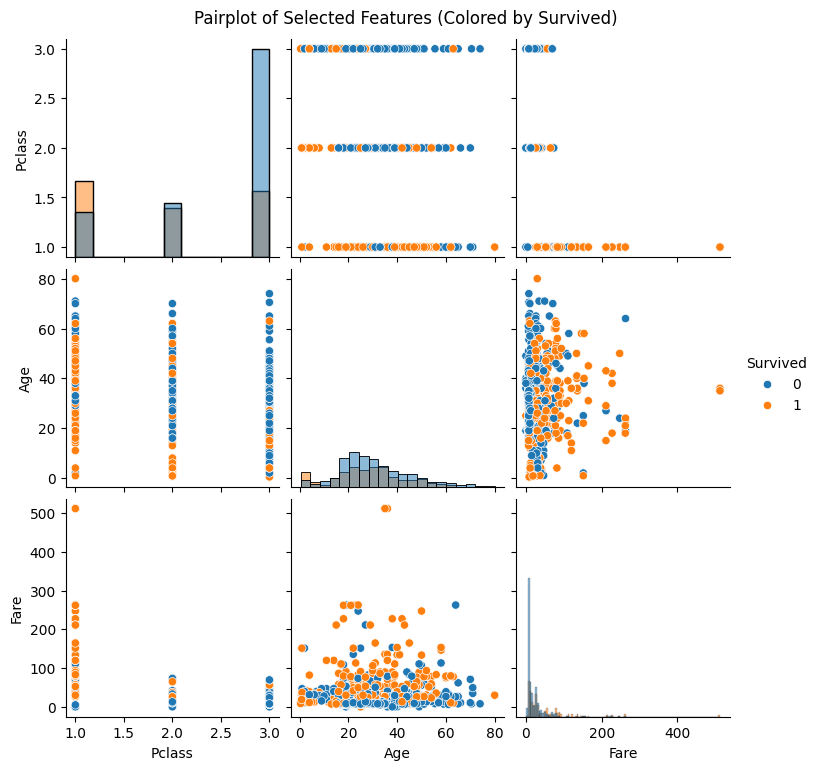

In [18]:
# 3) Pairplot
# Create a pairplot for a subset of variables (e.g., Survived, Pclass, Age, Fare).
# Use hue='Survived' to color points.

# write your code
subset = df[['Survived', 'Pclass', 'Age', 'Fare']]

sns.pairplot(subset, hue='Survived', diag_kind='hist', corner=False)
plt.suptitle("Pairplot of Selected Features (Colored by Survived)", y=1.02)
plt.show()

Q. Identify any pair of variables where survivors and non-survivors appear well separated.  
A. pclass/fare 쌍이 가장 분리가 잘 이루어져있음. 많은 돈을 지불하면 1등석에 탈 가능성이 높아지기 때문에 이러한 결과는 비교적 명백함.

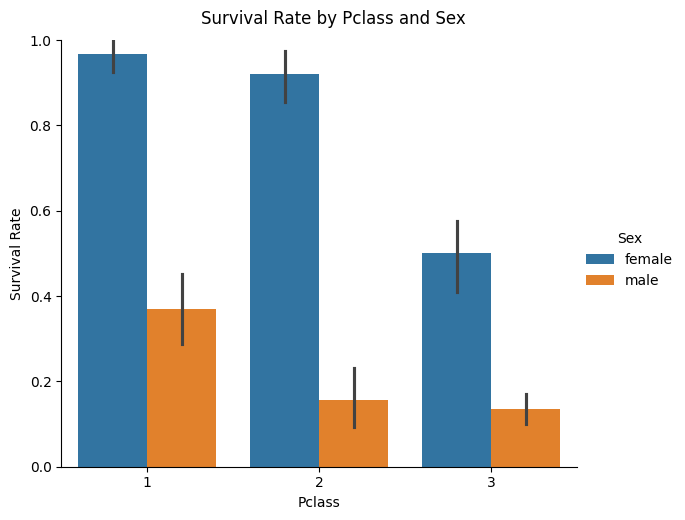

In [19]:
# 4) Catplot: Survival by Pclass and Sex
# Create a categorical plot (e.g., sns.catplot with kind='bar') showing survival rate by Pclass and Sex (as hue).

# write your code
g = sns.catplot(data=df, x="Pclass", y="Survived", hue="Sex", kind="bar", height=5, aspect=1.2)
g.fig.suptitle("Survival Rate by Pclass and Sex", y=1.03)
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

Q. Discuss which subgroup (e.g., 1st class females) has the highest survival rate and which has the lowest.  
A. 1등석 여성이 가장 높은 생존률을 보이며, 3등석 남성이 가장 낮은 생존률을 보임. 좋은 좌석일 수록 생존률이 높은데다가, 여성이 우선적으로 구조되었기 때문에 이러한 결과가 나온 것으로 추정됨.

Text(0.5, 1.02, 'Jointplot: Age vs. Fare (Colored by Pclass)')

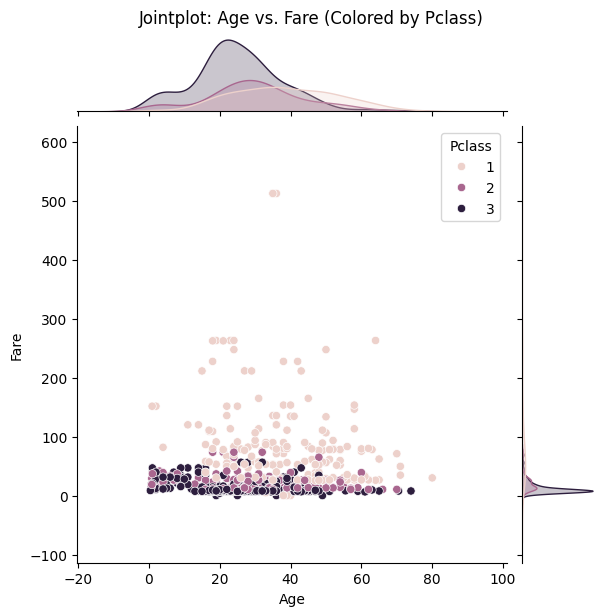

In [20]:
# 5) Design Your Own Multivariate Plot
# Propose and implement one additional multivariate visualization not directly shown in the slides (e.g., a facet scatterplot, stacked bar chart, or jointplot).

# write your code
sns.jointplot(data=df, x="Age", y="Fare", hue="Pclass", kind="scatter", height=6)
plt.suptitle("Jointplot: Age vs. Fare (Colored by Pclass)", y=1.02)

Q. Explain the design choices (axes, hues, facets) and what new insight it provides beyond previous plots.  
A. 위 플롯은 Age를 x축, Fare를 y축으로 설정하여 승객의 연령과 지불 요금 간의 관계를 동시에 시각화하도록 하였다. 그리고 Pclass를 hue로 지정하여 각 객실 등급이 Age–Fare 공간에서 어떻게 분포하는지 색으로 구분할 수 있게 했다. Jointplot은 각 변수의 단변량 분포와 이변량 관계를 동시에 확인할 수 있다는 장점이 있다. 이 시각화는 이전의 survived-age나 survived-fare 이변량 분석에서는 보이지 않았던, 객실 등급별로 어떤 연령대가 어떤 요금대를 형성하는지를 더 명확히 보여준다. 가령, 1등석은 상대적으로 높은 Fare 구간에 집중되어 있고 Age 분포도 성인 중심으로 뚜렷한 반면, 3등석은 낮은 Fare와 다양한 연령대로 넓게 퍼져 있어 계층 간 분포 차이가 분명하게 드러난다.

# 4. Evaluation Visualizations

Assume you have trained at least two models (e.g., Logistic Regression
and Random Forest).

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# 데이터 준비
X = df.drop(columns=["Survived", "PassengerId", "Name", "Ticket", "Cabin"])
y = df["Survived"]

# 수치형 / 범주형 컬럼 나누기
numeric_features = ["Age", "SibSp", "Parch", "Fare", "Pclass"]
categorical_features = ["Sex", "Embarked"]

# 전처리 파이프라인
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# 각 모델에 대해 5-fold 교차검증 후 평균 점수 계산
scores = {}
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])
    cv_score = cross_val_score(pipe, X, y, cv=5).mean()
    scores[name] = cv_score

# 결과를 DataFrame으로 정리
model_scores = pd.DataFrame({
    "Model": list(scores.keys()),
    "CV_Score": list(scores.values())
})

                 Model  CV_Score
0  Logistic Regression  0.785651
1        Random Forest  0.809234
2                  SVM  0.675733
3                  KNN  0.701506


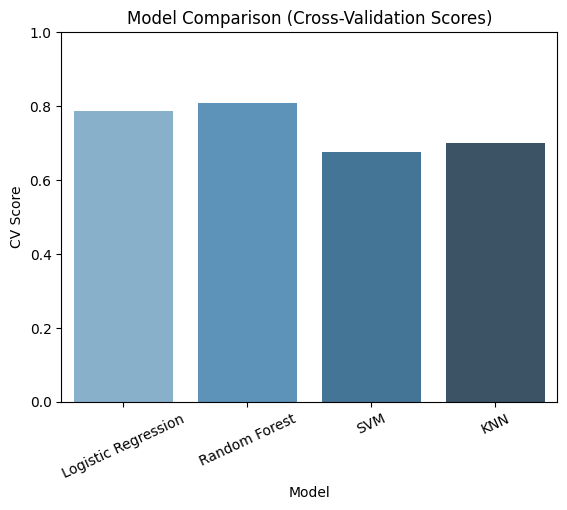

In [23]:
# 1) Model Score Barplot
# Create a small DataFrame with model names and their cross-validation scores.
# Plot a barplot comparing model scores.

# write your code
'''
model_scores = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM", "KNN"],
    "CV_Score": [0.78, 0.82, 0.80, 0.75]
})
'''

print(model_scores)

# barplot
sns.barplot(data=model_scores, x="Model", y="CV_Score", hue="Model", palette="Blues_d")
plt.title("Model Comparison (Cross-Validation Scores)")
plt.ylabel("CV Score")
plt.ylim(0, 1)
plt.xticks(rotation=25)
plt.show()

Q. Comment on which model you would choose and why.  
A. 여러 모델의 교차검증 결과를 비교했을 때, Random Forest가 가장 높은 CV 점수를 기록하였다. 이는 Random Forest가 비선형적인 관계를 잘 포착하고, 특성 간 상호작용을 자동으로 모델링할 수 있다는 장점이 있어, Titanic과 같이 범주형/연속형 변수가 섞여 있으며 비선형적 패턴이 존재하는 데이터셋에서 특히 유리하기 때문으로 생각된다. 예측 성능을 최우선사항으로 고려했을 때 Random Forest를 선택하는 것이 가장 적합하다.

[[91 14]
 [33 41]]


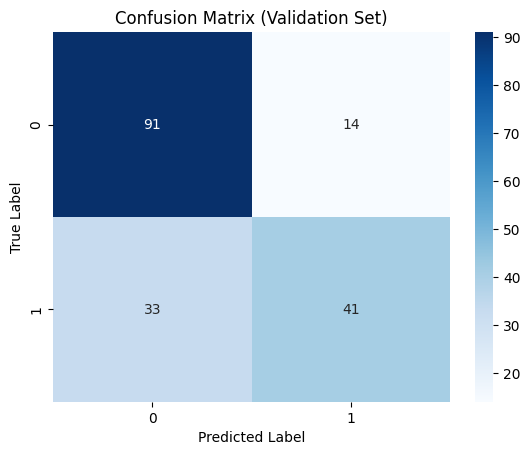

In [24]:
# 2) Confusion Matrix
# For one chosen model, compute and plot a confusion matrix on the training or validation set.

# write your code
features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
X = df[features].fillna(0)
y = df["Survived"]

# train/test data split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# logistic regresion
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# confusion matrix
y_pred = model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

print(cm)

# visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Validation Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Q. Interpret each cell (TP, TN, FP, FN) in the context of Titanic survival.  
A. 
- TP: 모델이 생존했다고 예측 & 실제로도 생존. 실제 생존자를 정확히 생존자로 맞힌 경우.
- TN: 모델이 사망했다고 예측 & 실제로도 사망. 실제 사망자를 올바르게 사망자로 분류한 경우.
- FP: 모델은 생존했다고 예측 & 실제로는 사망. 생존자로 잘못 판단된 실제 사망자. 구조될 가능성을 과대평가함.
- FN: 모델은 사망했다고 예측 & 실제로는 생존. 사망했다고 잘못 분류된 실제 생존자. 살아남을 가능성을 과소평가함.

Q. Discuss the trade-off between correctly predicting survivors vs. non-survivors.  
A. Titanic 데이터에서는 생존자보다 사망자가 더 많기에, 모델이 기본적으로 사망자를 예측하기가 더 쉬워진다. 이런 경우에는 TN이 높아지는 경향이 있다. 하지만 생존자를 더 잘 맞히려면 결정 경계를 생존 쪽으로 이동시켜야 하고, 그 과정에서 잘못된 생존 예측(FP)이 증가할 수 있다. 반대로 사망자를 더 정확히 맞히려 하면 생존자로 예측되는 범위를 좁혀야 하므로 실제 생존자를 놓치는 FN이 증가하게 된다. 즉, 생존자를 민감하게 탐지하면 FP가 늘고, 사망자를 더 엄밀히 판단하면 FN이 증가하는 trade-off가 발생한다. 어떤 쪽을 우선할지는 문제 상황의 목적에 따라 달라지는데, 만약 생존 예측이 구조 우선순위와 연결된다고 가정하면 생존자를 놓치지 않는 것(FN 최소화)이 더 중요할 것이라 생각해볼 수 있다.

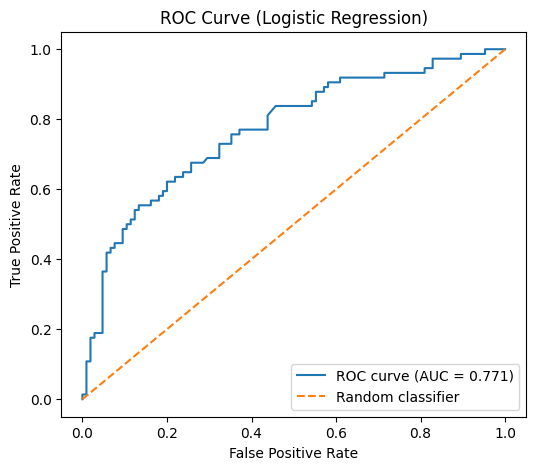

In [25]:
# 3) ROC Curve (Bonus)
# Plot the ROC curve for one model using predicted probabilities.

# write your code
y_proba = model.predict_proba(X_val)[:, 1] # prediction probability

# roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
auc = roc_auc_score(y_val, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression)")
plt.legend(loc="lower right")
plt.show()

In [26]:
# Compute and report the AUC.  

# write your code
auc = roc_auc_score(y_val, y_proba)
print("AUC:", auc)

AUC: 0.7708494208494209


Q. Briefly discuss how the ROC curve complements accuracy and confusion matrix.  
A. ROC curve는 단순 정확도나 혼동행렬으로는 알 수 없는 임계값 변화에 따른 모델의 전체적인 성능 패턴을 시각적으로 보여주는 것에 초점을 맞춘다. Accuracy는 데이터의 불균형에 민감하여, 사망자가 더 많은 Titanic 데이터에서는 높은 정확도가 실제 성능을 의미하지 않을 수 있다. 혼동행렬은 특정 임계값에서의 TP, FP, TN, FN만 보여 주기 때문에 임계값을 바꾸었을 때 모델 행동이 어떻게 변하는지 알 수 없다. 반면 ROC curve는 민감도와 거짓 양성률의 관계를 다양한 임계값에서 보여주어, 모델의 분류 능력을 더 넓은 관점에서 평가할 수 있게 한다.  
AUC 점수는 모델이 전체적으로 얼마나 잘 구분하는지를 하나의 지표로 요약해주어 accuracy만 볼 때보다 더 공정하고 안정적인 평가 기준을 제공한다.

  Feature  Importance
3   Parch    0.053131
2   SibSp    0.063065
0  Pclass    0.083780
1     Age    0.367080
4    Fare    0.432944


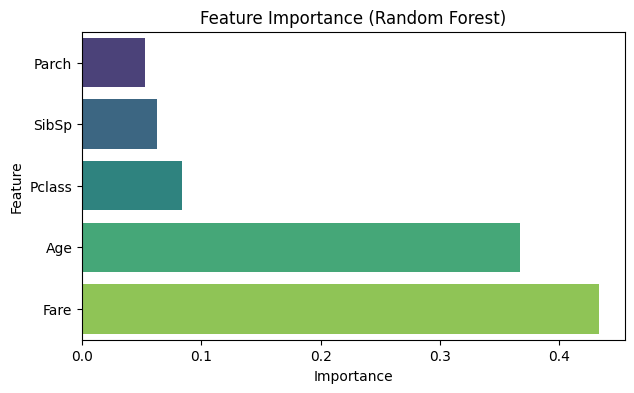

In [27]:
# 4) Feature Importance Plot (Bonus)
# For a tree-based model (e.g., Random Forest), plot feature importances as a horizontal bar chart.

# write your code
# data preparation
features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
X = df[features].fillna(0)
y = df["Survived"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# random forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values("Importance", ascending=True)

print(fi_df)

# horizontal bar chart
plt.figure(figsize=(7,4))
sns.barplot(data=fi_df, x="Importance", y="Feature", hue='Feature', legend=False, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Q. Compare the visual importance ranking with the relationships you observed in your earlier visualizations.  
A. 시각적으로 확인한 feature importance 결과는 이전에 수행한 단변량 및 이변량 시각화에서 관찰한 패턴과 대체로 일관된 모습을 보인다. Fare, Age는 초기 시각화에서도 생존과 큰 관련성을 보였기 때문이다. 전반적으로 모델의 중요도 순위가 시각적 탐색에서 발견한 주요 패턴을 잘 반영하며, 이는 시각적 분석과 모델 기반 분석이 서로 정합적임을 보여준다.